## Score Analysis

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [63]:
ver = '1'

In [64]:
model_dict_1 = pickle.load(open('model_perf.pkl_'+ver,'rb'))

In [65]:
model_df = pd.DataFrame(model_dict_1['models'])

In [66]:
model_df.sort_values('AUC Score',ascending=False)

,Feature Transform,model_type,C,no_of_features,CrossValDays,Confusion Matrices,AUC Scores,TN,FP,FN,TP,AUC Score,Min Leaves,Number of Neighbors,metric,weight,no_of_trees,min_leaves,Kernel
1035,None,Support Vector Classifier,0.10,5,"[0, 150, 300, 450, 600, 750, 900, 1050, 1200, ...","[[[109, 46], [116, 29]], [[83, 63], [62, 92]],...","[0.5599110122358176, 0.6501512186443693, 0.675...","[109, 83, 39, 133, 45, 130, 155, 148, 159, 171]","[46, 63, 126, 16, 119, 47, 0, 0, 2, 0]","[116, 62, 12, 141, 6, 63, 143, 151, 139, 129]","[29, 92, 123, 10, 130, 60, 2, 1, 0, 0]",0.624847,NaN,NaN,NaN,NaN,NaN,NaN,poly
1034,None,Support Vector Classifier,0.10,5,"[0, 150, 300, 450, 600, 750, 900, 1050, 1200, ...","[[[101, 54], [101, 44]], [[115, 31], [88, 66]]...","[0.5554393770856507, 0.6465486568226295, 0.667...","[101, 115, 37, 0, 43, 130, 155, 148, 158, 171]","[54, 31, 128, 149, 121, 47, 0, 0, 3, 0]","[101, 88, 13, 0, 7, 69, 145, 149, 115, 129]","[44, 66, 122, 151, 129, 54, 0, 3, 24, 0]",0.624641,NaN,NaN,NaN,NaN,NaN,NaN,linear
3,None,Logistic Regression,0.10,5,"[0, 150, 300, 450, 600, 750, 900, 1050, 1200, ...","[[[96, 59], [94, 51]], [[84, 62], [69, 85]], [...","[0.5541713014460512, 0.6469489414694894, 0.659...","[96, 84, 41, 0, 48, 141, 155, 148, 135, 171]","[59, 62, 124, 149, 116, 36, 0, 0, 26, 0]","[94, 69, 15, 0, 7, 75, 140, 148, 105, 129]","[51, 85, 120, 151, 129, 48, 5, 4, 34, 0]",0.624430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038,None,Support Vector Classifier,1.00,5,"[0, 150, 300, 450, 600, 750, 900, 1050, 1200, ...","[[[97, 58], [95, 50]], [[108, 38], [80, 74]], ...","[0.5549944382647385, 0.6475716064757161, 0.675...","[97, 108, 10, 0, 38, 120, 155, 148, 158, 171]","[58, 38, 155, 149, 126, 57, 0, 0, 3, 0]","[95, 80, 1, 0, 11, 69, 145, 152, 114, 129]","[50, 74, 134, 151, 125, 54, 0, 0, 25, 0]",0.622766,NaN,NaN,NaN,NaN,NaN,NaN,linear
1042,None,Support Vector Classifier,10.00,5,"[0, 150, 300, 450, 600, 750, 900, 1050, 1200, ...","[[[97, 58], [95, 50]], [[107, 39], [79, 75]], ...","[0.5549721913236929, 0.6474381782600961, 0.675...","[97, 107, 10, 0, 37, 122, 155, 148, 158, 171]","[58, 39, 155, 149, 127, 55, 0, 0, 3, 0]","[95, 79, 1, 0, 11, 70, 145, 152, 114, 129]","[50, 75, 134, 151, 125, 53, 0, 0, 25, 0]",0.622258,NaN,NaN,NaN,NaN,NaN,NaN,linear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,None,Support Vector Classifier,0.10,20,"[0, 150, 300, 450, 600, 750, 900, 1050, 1200, ...","[[[155, 0], [145, 0]], [[146, 0], [154, 0]], [...","[0.4521023359288098, 0.40980252624088237, 0.45...","[155, 146, 165, 149, 161, 158, 151, 68, 0, 0]","[0, 0, 0, 0, 3, 19, 4, 80, 161, 171]","[145, 154, 135, 151, 134, 114, 141, 63, 0, 0]","[0, 0, 0, 0, 2, 9, 4, 89, 139, 129]",0.468936,NaN,NaN,NaN,NaN,NaN,NaN,rbf
1159,None,Support Vector Classifier,0.01,45,"[0, 150, 300, 450, 600, 750, 900, 1050, 1200, ...","[[[155, 0], [145, 0]], [[146, 0], [154, 0]], [...","[0.4888542825361513, 0.41834193204056225, 0.39...","[155, 146, 165, 149, 160, 167, 147, 142, 0, 2]","[0, 0, 0, 0, 4, 10, 8, 6, 161, 169]","[145, 154, 135, 151, 133, 117, 138, 145, 1, 1]","[0, 0, 0, 0, 3, 6, 7, 7, 138, 128]",0.463209,NaN,NaN,NaN,NaN,NaN,NaN,poly
1175,None,Support Vector Classifier,0.01,50,"[0, 150, 300, 450, 600, 750, 900, 1050, 1200, ...","[[[155, 0], [145, 0]], [[146, 0], [154, 0]], [...","[0.48880978865406005, 0.41825297989681554, 0.3...","[155, 146, 165, 149, 160, 167, 147, 142, 0, 2]","[0, 0, 0, 0, 4, 10, 8, 6, 161, 169]","[145, 154, 135, 151, 133, 117, 138, 145, 1, 1]","[0, 0, 0, 0, 3, 6, 7, 7, 138, 128]",0.456256,NaN,NaN,NaN,NaN,NaN,NaN,poly
1127,None,Support Vector Classifier,0.01,35,"[0, 150, 300, 450, 600, 750, 900, 1050, 1200, ...","[[[155, 0], [145, 0]], [[146, 0], [154, 0]], [...","[0.48858731924360405, 0.4180305995374488, 0.39...","[155, 146, 165, 149, 160, 167, 147, 142, 0, 2]","[0, 0, 0, 0, 4, 10, 8, 6, 161, 169]","[145, 154, 135, 151, 133, 117, 138, 145, 1, 1]","[0, 0, 0, 0, 3, 6, 7, 7, 138, 128]",0.455628,NaN,NaN,NaN,NaN,NaN,NaN,poly


In [67]:
model_df['model_type'].unique()

array(['Logistic Regression', 'Decision Tree Regressor', 'K Neighbors',
       'Random Forest', 'Support Vector Classifier'], dtype=object)

<h2>Model Summaries</h2>
<table style="width:80%">
<tr>
<th>Model</th>
<th>Hyperparameters</th>
<th>No of Features</th>
<th>AUC Score</th>
</tr>
<tr>
<td>Logistic Regression</td>
<td>C -  0.1</td>
<td>5</td>
<td>0.624</td>
</tr>
<tr>
<td>Decision Tree Classifier</td>
<td>Min Leaves -  30</td>
<td>30</td>
<td>0.584</td>
</tr>
<tr>
<td>K Nearest Neighbors</td>
<td>No of Neighbors -  3<br>Metric - Euclidean<br>Weight - Distance</td>
<td>40</td>
<td>0.548</td>
</tr>
<tr>
<td>Random Forest</td>
<td>No of Trees -  100<br>Min Leaves - 7</td>
<td>45</td>
<td>0.593</td>
</tr>
<tr>
<td>Support Vector Classifier</td>
<td>C - 0.1<br>Kernel - Polynomial</td>
<td>5</td>
<td>0.625</td>
</tr>
</table>

# Logistic Regression Model Analysis

In [68]:
log_reg = model_df[model_df['model_type'] == 'Logistic Regression']

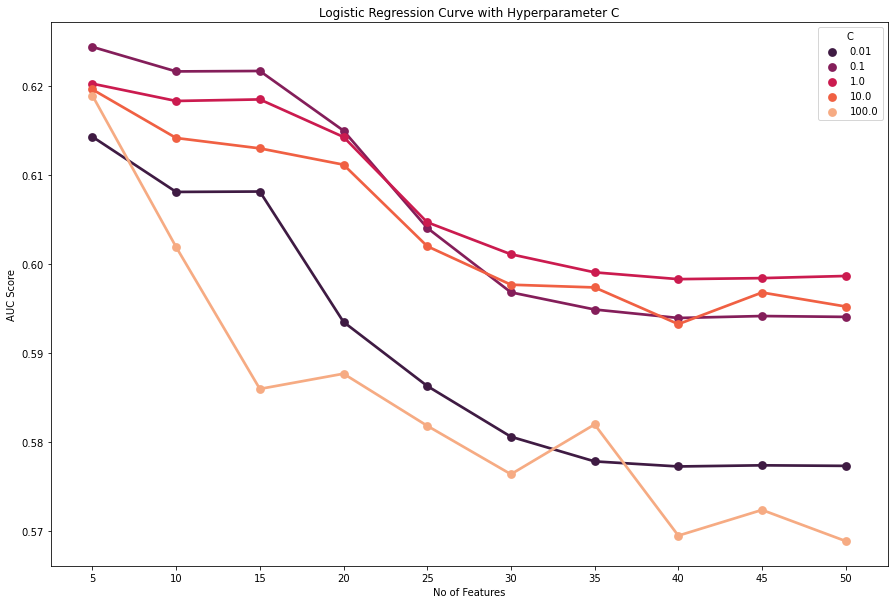

In [69]:
fig,axes = plt.subplots(figsize=(15,10))
sns.pointplot(x='no_of_features',y='AUC Score',hue='C',data=log_reg, palette = 'rocket')
plt.title('Logistic Regression Curve with Hyperparameter C')
plt.xlabel('No of Features')
plt.savefig('log_reg_1')
plt.show()


Notes : 
    Experiment with C value less than 0.01

# Decision Tree Classifier

In [70]:
dec_cls = model_df[model_df['model_type'] == 'Decision Tree Regressor']

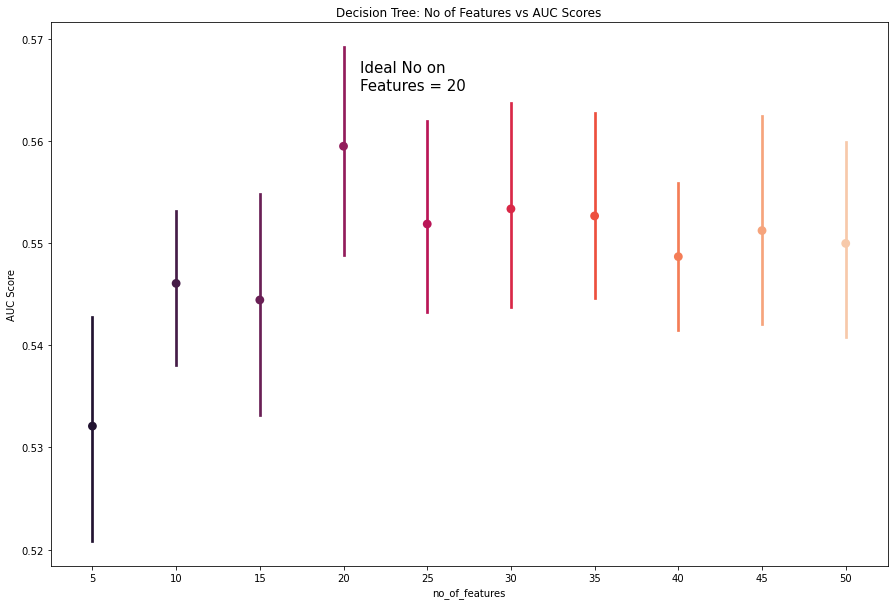

In [71]:
fig,axes = plt.subplots(figsize=(15,10))
sns.pointplot(x='no_of_features',y='AUC Score',data=dec_cls,palette='rocket')
plt.title('Decision Tree: No of Features vs AUC Scores')
plt.text(3.2,0.565,'Ideal No on\nFeatures = 20',fontsize=15)
plt.savefig('dec_tree_1')
plt.show()

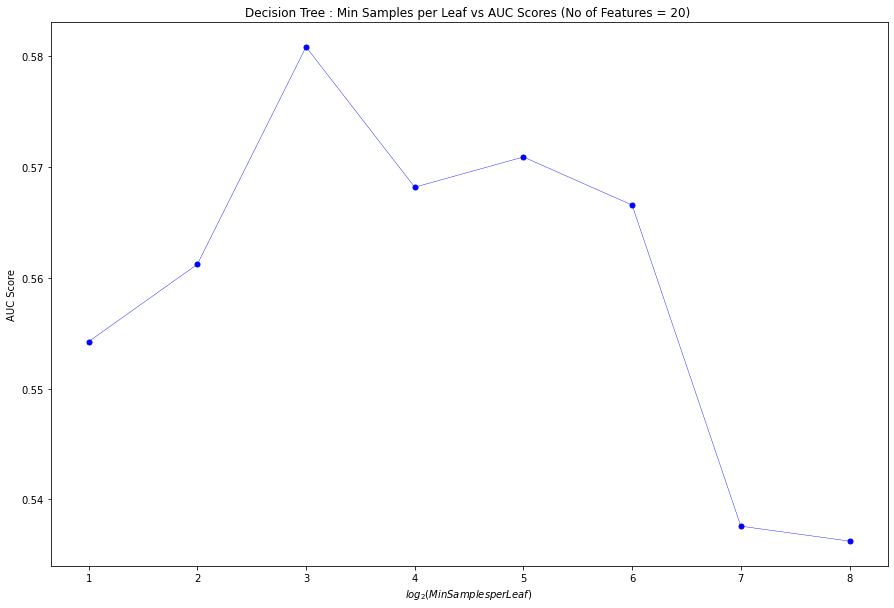

In [88]:
dec_cls_20 = dec_cls[dec_cls['no_of_features']==20]
fig,axes = plt.subplots(figsize=(15,10))
plt.plot(np.log2(dec_cls_20['Min Leaves']),dec_cls_20['AUC Score'],'bo-',linewidth=0.4,markersize=5)
plt.title('Decision Tree : Min Samples per Leaf vs AUC Scores (No of Features = 20) ')
plt.xlabel(r'$log_2(Min Samples per Leaf)$')
plt.ylabel('AUC Score')
plt.savefig('dec_tree_2')
plt.show()

# K Nearest Neighbors

In [73]:
knn = model_df[model_df['model_type'] == 'K Neighbors']

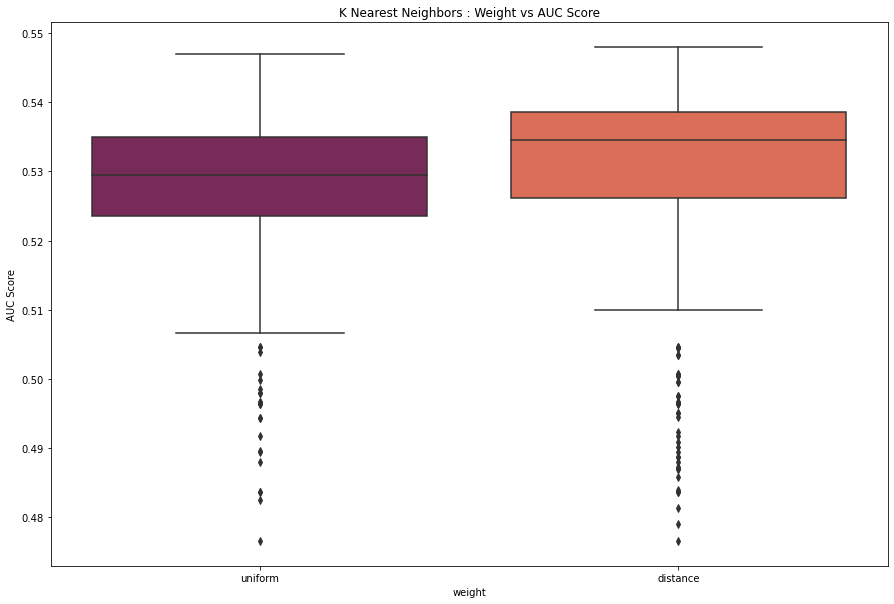

In [74]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=knn,x='weight',y='AUC Score',palette='rocket')
plt.title('K Nearest Neighbors : Weight vs AUC Score')
plt.savefig('knn_1')
plt.show()

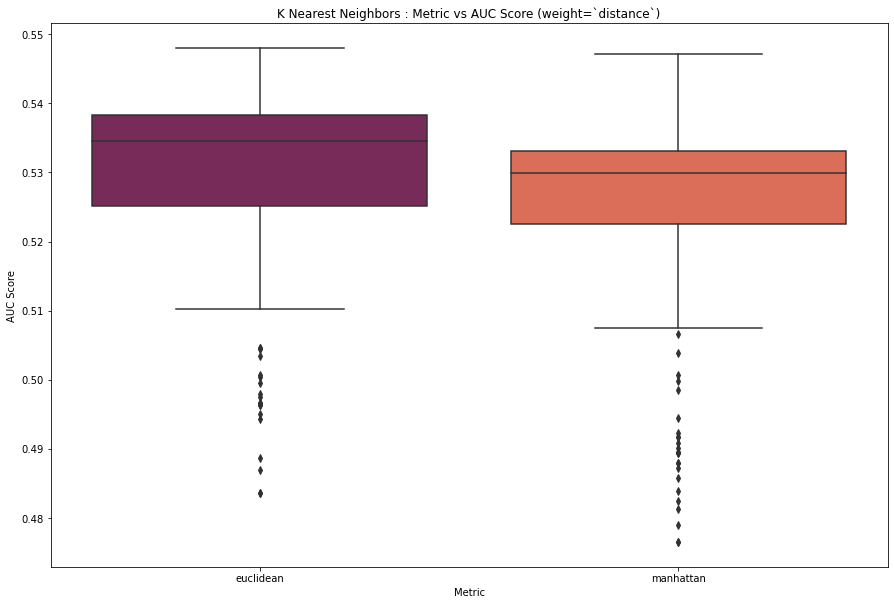

In [75]:
knn_2 = model_df[(model_df['model_type'] == 'K Neighbors') & (model_df['metric']!='minkowski')]
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=knn_2,x='metric',y='AUC Score',palette='rocket')
plt.title('K Nearest Neighbors : Metric vs AUC Score (weight=`distance`)')
plt.xlabel('Metric')
plt.savefig('knn_2')
plt.show()

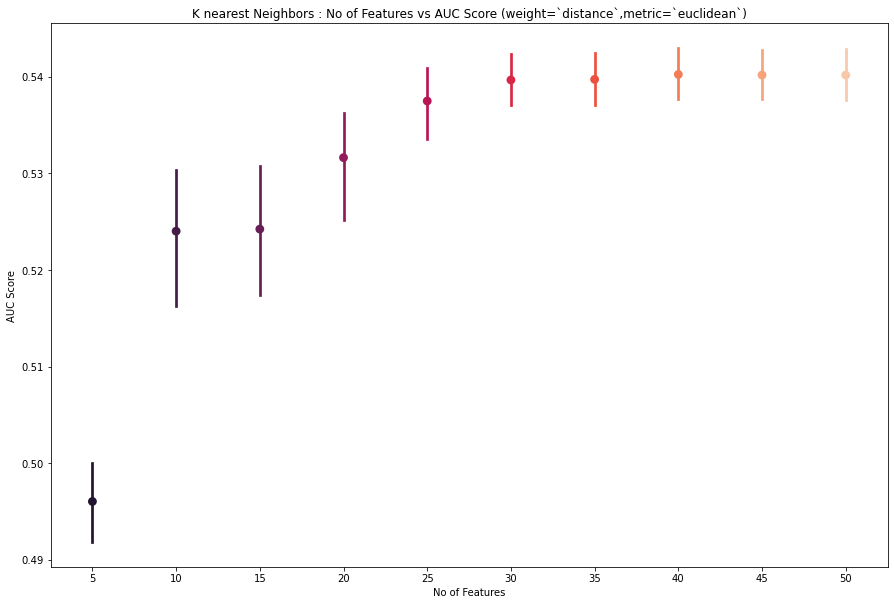

In [76]:
knn_opt = knn[(knn['metric']=='euclidean') & (knn['weight']=='distance')]
fig,axes = plt.subplots(figsize=(15,10))
sns.pointplot(x='no_of_features',y='AUC Score',data=knn_opt,palette='rocket')
plt.title('K nearest Neighbors : No of Features vs AUC Score (weight=`distance`,metric=`euclidean`)')
plt.xlabel('No of Features')
plt.savefig('knn_3')
plt.show()

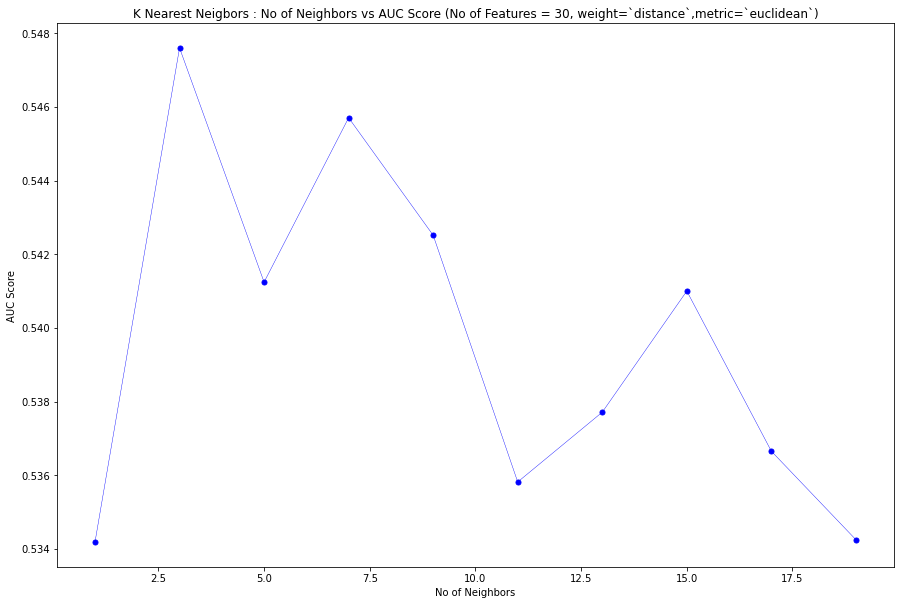

In [77]:
knn_opt_30 = knn_opt[knn_opt['no_of_features']==30]
fig,axes = plt.subplots(figsize=(15,10))
plt.plot(knn_opt_30['Number of Neighbors'],knn_opt_30['AUC Score'],'bo-',linewidth=0.4,markersize=5)
plt.title('K Nearest Neigbors : No of Neighbors vs AUC Score (No of Features = 30, weight=`distance`,metric=`euclidean`)')
plt.xlabel(r'No of Neighbors')
plt.ylabel('AUC Score')
plt.savefig('knn_4')
plt.show()

# Random Forest 

In [78]:
rf = model_df[model_df['model_type']=='Random Forest']

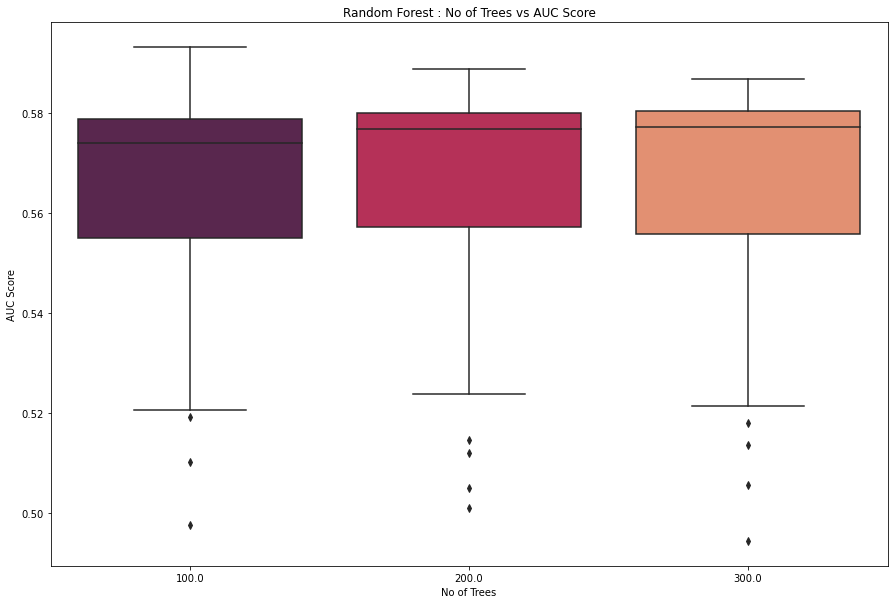

In [79]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=rf,x='no_of_trees',y='AUC Score',palette='rocket')
plt.title('Random Forest : No of Trees vs AUC Score')
plt.xlabel('No of Trees')
plt.savefig('rf_1')
plt.show()

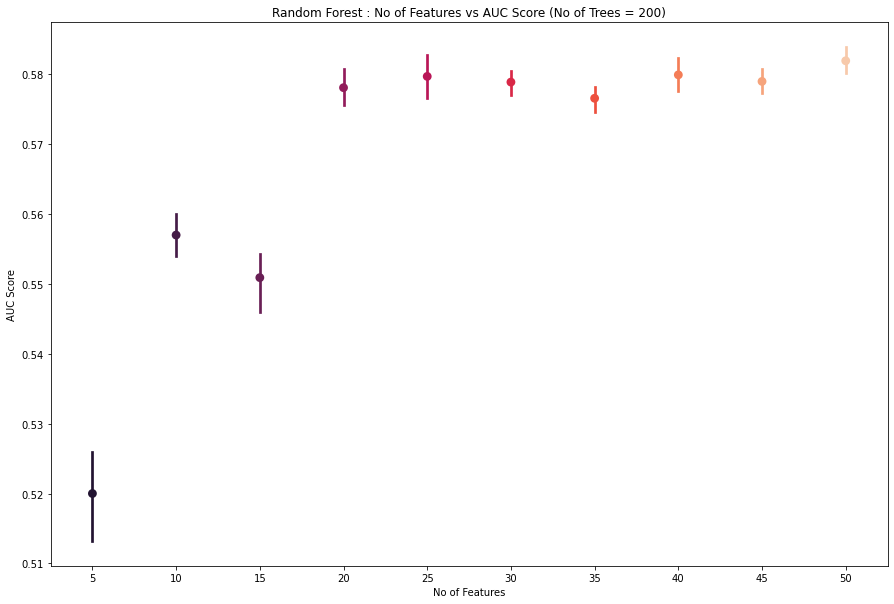

In [80]:
fig,axes = plt.subplots(figsize=(15,10))
rf_trees_200 = rf[rf['no_of_trees']==200]
sns.pointplot(data=rf_trees_200,x='no_of_features',y='AUC Score',palette='rocket')
plt.xlabel('No of Features')
plt.title('Random Forest : No of Features vs AUC Score (No of Trees = 200)')
plt.savefig('rf_2')
plt.show()

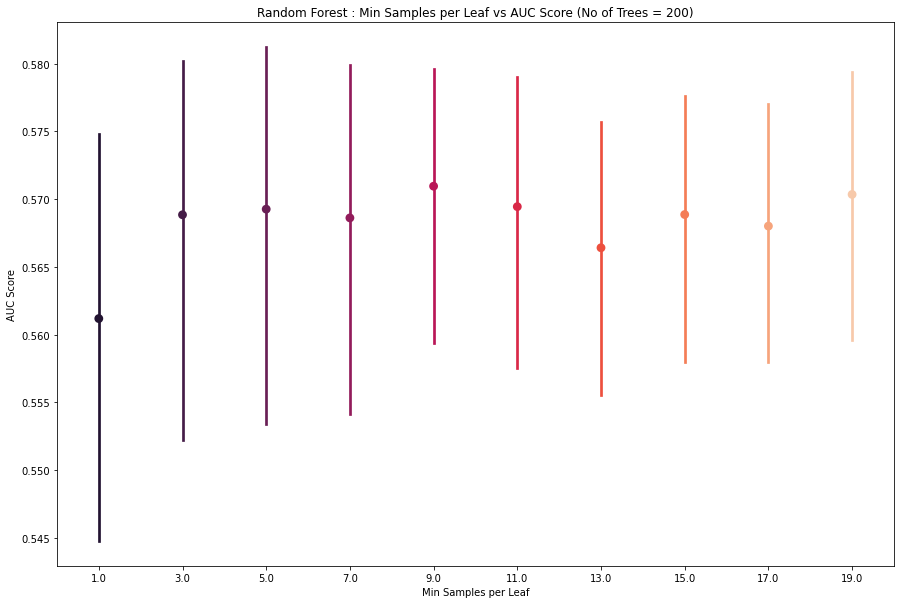

In [89]:
fig,axes = plt.subplots(figsize=(15,10))
sns.pointplot(data=rf_trees_200,x='min_leaves',y='AUC Score',palette='rocket')
# plt.plot(rf_trees_200_50['min_leaves'],rf_trees_200_50['AUC Score'],'bo-',linewidth=0.4,markersize=5)
# sns.pointplot(data=rf_trees_200,x='no_of_features',y='AUC Score',palette='rocket')
plt.xlabel('Min Samples per Leaf')
plt.title('Random Forest : Min Samples per Leaf vs AUC Score (No of Trees = 200)')
plt.savefig('rf_3')


# SVM

In [82]:
svm = model_df[model_df['model_type']=='Support Vector Classifier']

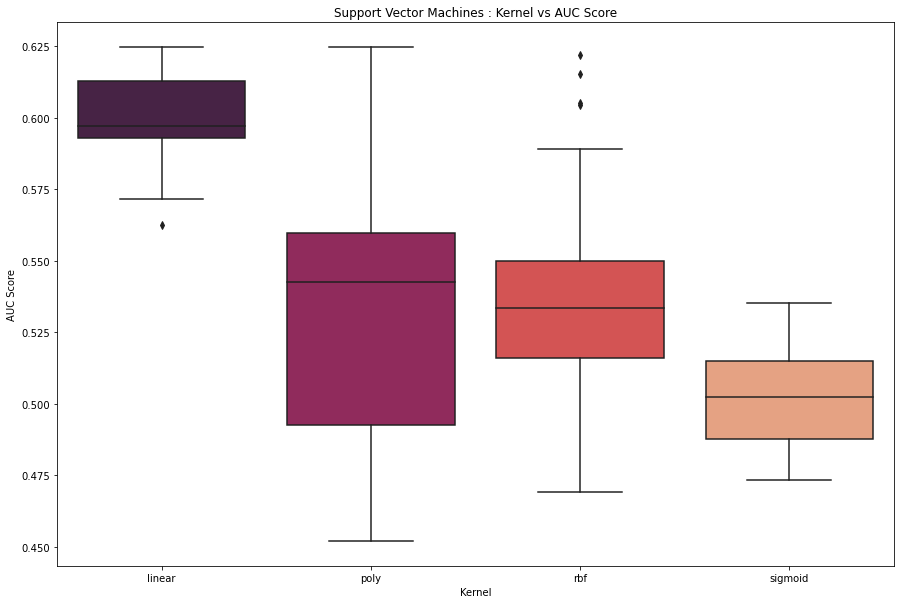

In [83]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=svm,x='Kernel',y='AUC Score',palette='rocket')
plt.title('Support Vector Machines : Kernel vs AUC Score')
plt.savefig('svm_1')
plt.show()

In [84]:
svm_linear = svm[svm['Kernel']=='linear']

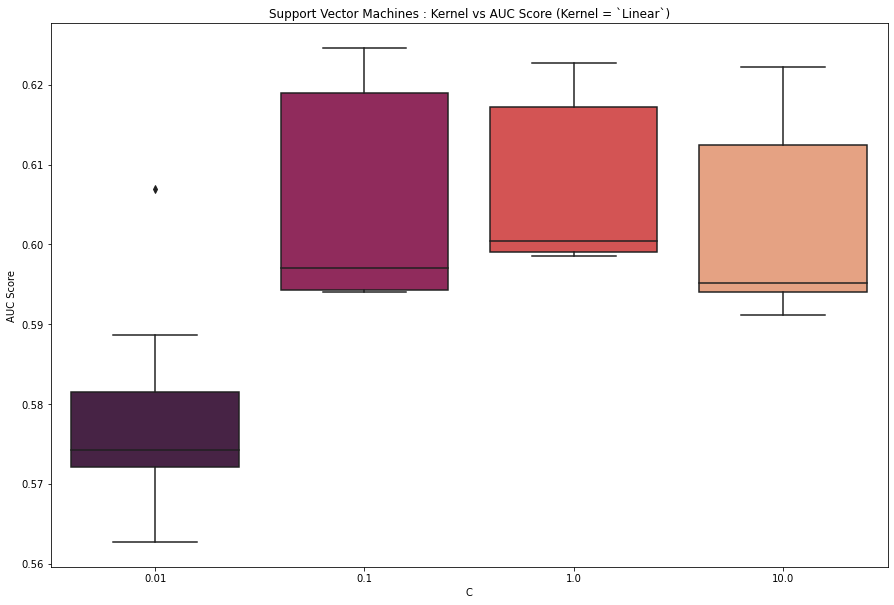

In [85]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=svm_linear,x='C',y='AUC Score',palette='rocket')
plt.title('Support Vector Machines : Kernel vs AUC Score (Kernel = `Linear`)')
plt.savefig('svm_2')
plt.show()

In [86]:
svm_linear_c_10 = svm_linear[svm_linear['C']==0.1]

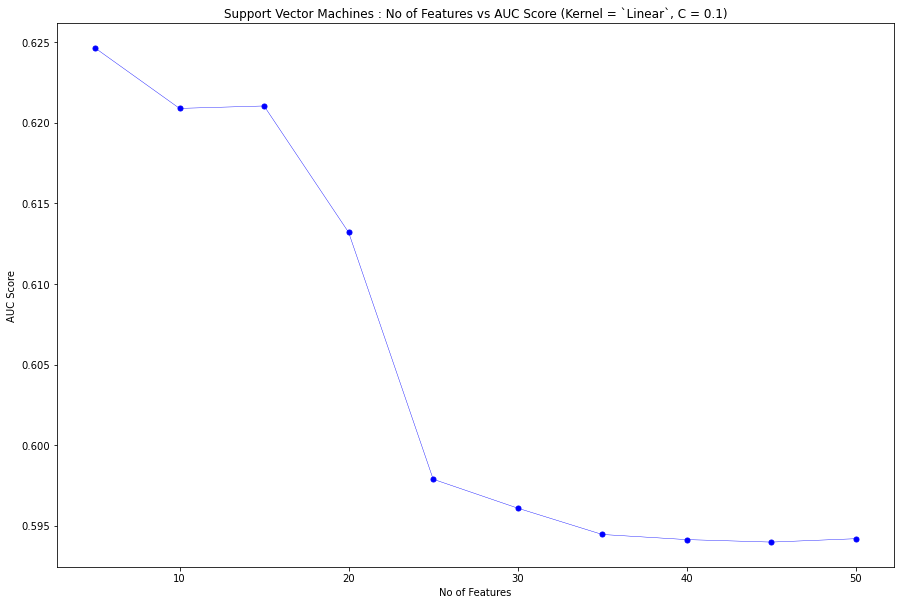

In [87]:
fig,axes = plt.subplots(figsize=(15,10))
plt.plot(svm_linear_c_10['no_of_features'],svm_linear_c_10['AUC Score'],'bo-',linewidth=0.4,markersize=5)
plt.title('Support Vector Machines : No of Features vs AUC Score (Kernel = `Linear`, C = 0.1)')
plt.xlabel('No of Features')
plt.ylabel('AUC Score')
plt.savefig('svm_3')
plt.show()